# python ve veri bilimine giriş
## veri analizi


### kullanılan veri seti 
### Human Resources Data Set 
### kaggle bağlantısı https://www.kaggle.com/code/mksaad/human-resources-data-set-eda/data


# veri setinin açıklaması
#### human resorce  data set =insan kaynakları verisi 
##### Employee_Name                 Çalışan ismi
##### EmpID                         Çalışan kimliği
##### MarriedID                     Evlilik kimliği
##### MaritalStatusID               Medeni Durum Kimliği
##### GenderID                      Cinsiyet Kimliği
##### EmpStatusID                   çalışan durum kimliği
##### DeptID                        departman kimliği
##### PerfScoreID                   performans skoru kimliği
##### FromDiversityJobFairID        Çeşitlilik İş Fuarı Kimliğinden
##### PayRate                       Ödeme oranı
##### Termd                         terim
##### PositionID                    Pozisyon Kimliği
##### Position                      Pozisyon
##### State                         Durum
##### Zip                           Posta kodu
##### DOB                           DOB
##### Sex                           Cinsiyet
##### MaritalDesc                   Evlilik Tanım nesnesi
##### CitizenDesc                   Vatandaş Tanım nesnesi
##### HispanicLatino                Hispanik Latin nesne
##### RaceDesc                      
##### DateofHire                    Kiralama tarihi nesnesi
##### DateofTermination             Fesih nesnesinin tarihi
##### TermReason                    
##### EmploymentStatus              İstihdam Durumu nesnesi
##### Department                    departman nesnesi
##### ManagerName                   YöneticiAdı nesnesi
##### ManagerID                     Yönetici Kimliği 
##### RecruitmentSource             
##### PerformanceScore              Performans Puanı
##### EngagementSurvey              Katılım Anketi
##### EmpSatisfaction               
##### SpecialProjectsCount          Özel Proje Sayısı 
##### LastPerformanceReview_Date    Son Performans İnceleme Tarihi nesnesi
##### DaysLateLast30                Geç gelinen Gün Son 30


In [1]:
#gerekli kütüphanelerin tanımlanması
import pandas as pd #veri işleme /cvs dosyaları I/O
import numpy as np #cebirsel işlemler
import matplotlib as plt#veri görselleştirmesinde kullandığımız temel python kütüphanesidir.
import seaborn as sns #görselleştirme aracı

In [2]:
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy import stats 
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### import komutundan sonra yüklenmek istenen kütüphane yazılır sonrasında yazılan as komutu ise yüklemek istenilen kütüphaneyi hangi kısaltma ile ifade edeceğimizi belirtmemizi sağlar

#### veri yüklemesi sırasında kontrol edilmesi gereken 2 unsur vardır

     1. verilerinizin dosya biçimi ile pandasta okutmak istediğiniz biçimin aynı olması
     2.verileriniz ile açtığınız python çalışmma sayfasının aynı yerde olması (farklı yerlerde ise doya konumuna dikkat edilmeli)
 
#### biz veri setini okurken başlıca okuma stillerinden biri olan
      read_cvs
#### komutunu kullanacağız

In [3]:
#incelenecek veri setini pandasla okuma
data = pd.read_csv("humanR.csv")

#### veri setinde izlencek adımlar verileri pandas ile okuttuktan sonra verilerin doğruluğu ile ilgili kontroller yapmak.Bu işlem veri üzerinde yapılcak olan işlemler için oldukça önemlidir. İlk olarak dikkat edilmesi gereken konulardan biri verinizin tipidir.

### veri analizinde genellikle 2 veri tipi üzerinde çalışılmaktadır
 ## series : sadece tek bir diziden oluşan
 
 ## dataframe: serilerden oluşmaktadır.
 
 ### type() metodu ile verilerimizin türünü rahatlıkla kontrol edebiliyoruz .eğer verileriniz analize uygun türde değilse verilerinizi dönüştürmeniz gerekmektedir.
 
 ## **dataframe dönüştürmek için data=pd.dataframe(data) komutu kullanılır

In [4]:
type(data)

pandas.core.frame.DataFrame

#### İlk beş satırı okutmak Çok büyük veri setleriyle çalıştığınızda veya verilere hızlıca göz atmak istediğinizde head() metodu kullanılmaktadır. Bu method baştan başlayarak kaç satır isterseniz onu gösterir.Parantez içine kaç satır görmek istediğinizi yazmanız yeterlidir.

In [5]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


Son beş satırı okutmak Verilerin satırlarını okuturken kullanılan bir diğer yöntem tail() yöntemidir. Bu yöntem sondan kaç satır isterseniz onu gösterir.Parantez içine kaç satır görmek istediğinizi yazmanız yeterlidir.

In [6]:
data.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#type bakmak
data.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [8]:
#data hakkında bilgi alımmı
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

In [9]:
#object olarak görünen değişkenlerini kategorik değişkene çevirelim
data.Employee_Name=pd.Categorical(data.Employee_Name)
data.DOB=pd.Categorical(data.DOB)
data.Sex=pd.Categorical(data.Sex)
data.MaritalDesc=pd.Categorical(data.MaritalDesc)
data.CitizenDesc=pd.Categorical(data.CitizenDesc)
data.HispanicLatino=pd.Categorical(data.HispanicLatino)
data.RaceDesc=pd.Categorical(data.RaceDesc)
data.DateofHire=pd.Categorical(data.DateofHire)
data.DateofTermination=pd.Categorical(data.DateofTermination)
data.TermReason=pd.Categorical(data.TermReason)
data.EmploymentStatus=pd.Categorical(data.EmploymentStatus)
data.Department=pd.Categorical(data.Department)
data.ManagerName=pd.Categorical(data.ManagerName)
data.RecruitmentSource =pd.Categorical(data.RecruitmentSource )
data.PerformanceScore=pd.Categorical(data.PerformanceScore)
data.LastPerformanceReview_Date=pd.Categorical(data.LastPerformanceReview_Date)
data.Position=pd.Categorical(data.Position)
data.State=pd.Categorical(data.State)


In [10]:
#object olarka görünen değişkenler kategorik olmuşmu diye kontrol edelim
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Employee_Name               310 non-null    category
 1   EmpID                       310 non-null    float64 
 2   MarriedID                   310 non-null    float64 
 3   MaritalStatusID             310 non-null    float64 
 4   GenderID                    310 non-null    float64 
 5   EmpStatusID                 310 non-null    float64 
 6   DeptID                      310 non-null    float64 
 7   PerfScoreID                 310 non-null    float64 
 8   FromDiversityJobFairID      310 non-null    float64 
 9   PayRate                     310 non-null    float64 
 10  Termd                       310 non-null    float64 
 11  PositionID                  310 non-null    float64 
 12  Position                    310 non-null    category
 13  State               

veri setinin betimlenmesi

In [11]:
#ortalma min max değer verir
#describe() metodu sayısal verilere sahip olan sütunların max, min , std… gibi istatiksel değerlerini döndürür.
# İstediğimiz takdirde describe() metodunu string verilerde de kullanabiliriz
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,302.000000,310.000000,310.000000,310.000000,207.0
mean,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,2.983871,0.093548,31.284806,0.332258,16.838710,6569.732258,14.579470,3.332097,3.890323,1.209677,0.0
std,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,0.577124,0.291670,15.383615,0.471785,6.232272,16933.864054,8.090352,1.290590,0.910690,2.352009,0.0
min,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1013.000000,1.000000,1.030000,1.000000,0.000000,0.0
25%,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,20.000000,0.000000,18.000000,1901.250000,10.000000,2.082500,3.000000,0.000000,0.0
50%,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,24.000000,0.000000,19.000000,2132.000000,15.000000,3.470000,4.000000,0.000000,0.0
75%,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,45.315000,1.000000,20.000000,2357.000000,19.000000,4.520000,5.000000,0.000000,0.0
max,1.988300e+09,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,80.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,0.0


In [12]:
#eksik gözlemleri göz ardı ederek ve kategorik değişkenleri görmezden gelerek veri seti betimlenmesi
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,9.354839e-02,2.916702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [13]:
#eksik gözlem var mı ?
data.isnull().values.any()

True

In [14]:
#hangi değişkenlerde kaç tane eksik gözlem mevcut
data.isnull().sum()

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

eksik verilerin duzenlenmesi icin farkli yontemler mevcut
ancak burada en temel olarak NA degerleri 0 ile degistirebiliriz,ortalama değer konulabiliriz, eksik verilerin tamamini silebiliriz.
ya da farklı bir çok yöntem uygulayabiliriz
bu noktada verisetini iyi anlayip seti bozmayacak en uygun yöntem secilmelidir

 eksik verilerin duzenlenmesi icin farkli yontemler mevcut
ancak burada en temel olarak NA degerleri 0 ile degistirebiliriz,ortalama değer konulabiliriz, eksik verilerin tamamini silebiliriz.
 ya da farklı bir çok yöntem uygulayabiliriz
 bu noktada verisetini iyi anlayip seti bozmayacak en uygun yöntem secilmelidir.
#### data["Employee_Name"].fillna(0, inplace = True)
#### data["EmpID"].fillna(planets.mass.mean(), inplace = True)

In [15]:
#kategorileri neler ?
data.Department.unique()

['Admin Offices', 'Sales', 'IT/IS', 'Production       ', 'Executive Office', 'Software Engineering', NaN]
Categories (6, object): ['Admin Offices', 'Executive Office', 'IT/IS', 'Production       ', 'Sales', 'Software Engineering']

In [16]:
#kaç ketagori mevcut ?
data["Department"].value_counts().count() 

6

In [17]:
#kategorilerin frekansları neler
data["Department"].value_counts()

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Department, dtype: int64

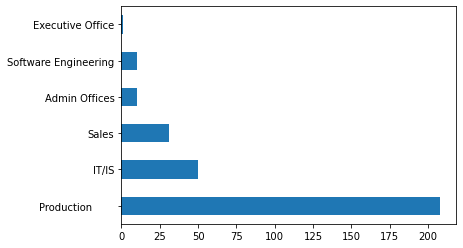

In [18]:
#üstte çıkan bilgiyi kapatmak için plot.barh() kullanılır
data["Department"].value_counts().plot.barh();

In [19]:
# sürekli değişken özetleri
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Employee_Name               310 non-null    category
 1   EmpID                       310 non-null    float64 
 2   MarriedID                   310 non-null    float64 
 3   MaritalStatusID             310 non-null    float64 
 4   GenderID                    310 non-null    float64 
 5   EmpStatusID                 310 non-null    float64 
 6   DeptID                      310 non-null    float64 
 7   PerfScoreID                 310 non-null    float64 
 8   FromDiversityJobFairID      310 non-null    float64 
 9   PayRate                     310 non-null    float64 
 10  Termd                       310 non-null    float64 
 11  PositionID                  310 non-null    float64 
 12  Position                    310 non-null    category
 13  State               

In [20]:
#data.select_dtypes Bu fonksiyon, dataframe içindeki istenilen veri tipindeki sütunları kullanıcıya döndürmektedir
numdata=data.select_dtypes(include=["float64","category"])
numdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [21]:
# describe() metodu sayısal verilere sahip olan sütunların max, min , std… gibi istatiksel değerlerini döndürür. 
numdata.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,9.354839e-02,2.916702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [22]:
print("Ortalama: " + str(numdata["PayRate"].mean()))
print("Dolu Gözlem Sayısı: " + str(numdata["PayRate"].count())) 
print("Maksimum Değer: " + str(numdata["PayRate"].max()))
print("Minimum Değer: " + str(numdata["PayRate"].min()))
print("Medyan: " + str(numdata["PayRate"].median()))
print("Standart Sapma: " + str(numdata["PayRate"].std()))

Ortalama: 31.28480645161292
Dolu Gözlem Sayısı: 310
Maksimum Değer: 80.0
Minimum Değer: 14.0
Medyan: 24.0
Standart Sapma: 15.383615284388798


# dağılım grafikleri


Text(0.5, 1.0, 'Department çalışan kişiler')

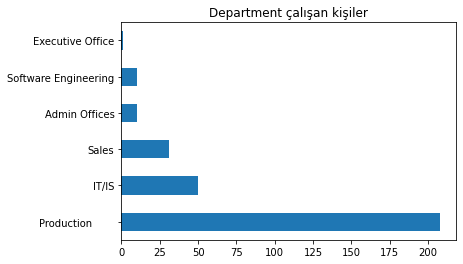

In [23]:
data["Department"].value_counts().plot.barh().set_title("Department çalışan kişiler")

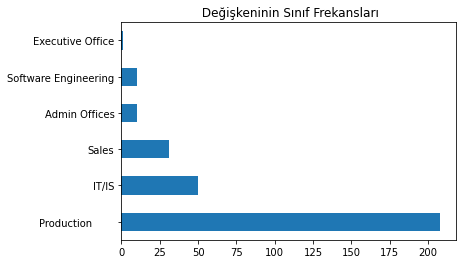

In [24]:
#sondaki ; işareti üstteki bilgi metninin görünmmesini sağlar
data["Department"].value_counts().plot.barh().set_title(" Değişkeninin Sınıf Frekansları");

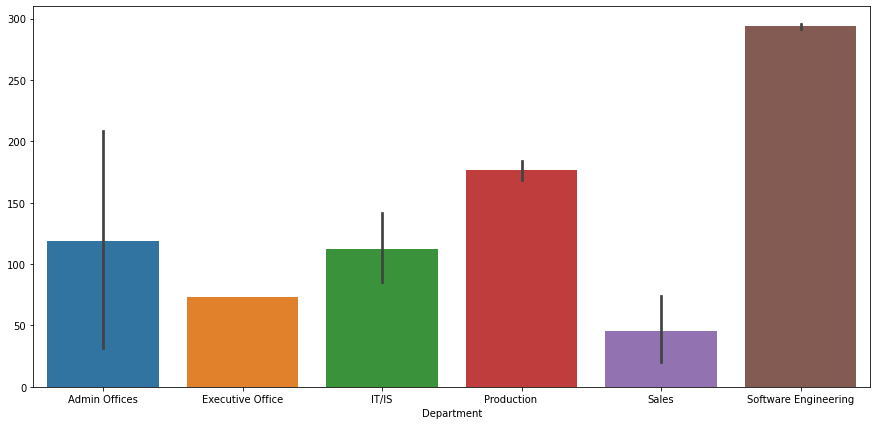

In [25]:
#aynısını seaborn kutuphanesi ile daha gorsel olarak gerceklestirebiliriz
#grafikteki siyah çubuklar standart sapma değeridir
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu
sns.barplot(x = "Department", y = data.Department.index, data= data);

<Figure size 1080x504 with 0 Axes>

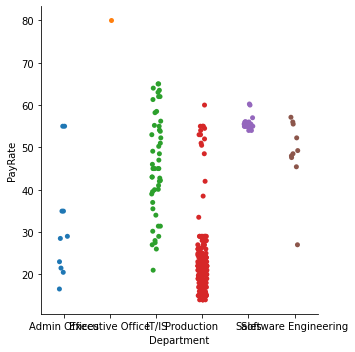

In [26]:
#departmanın ödeme oranına etkisi
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu
sns.catplot(x="Department",y="PayRate",data=data)

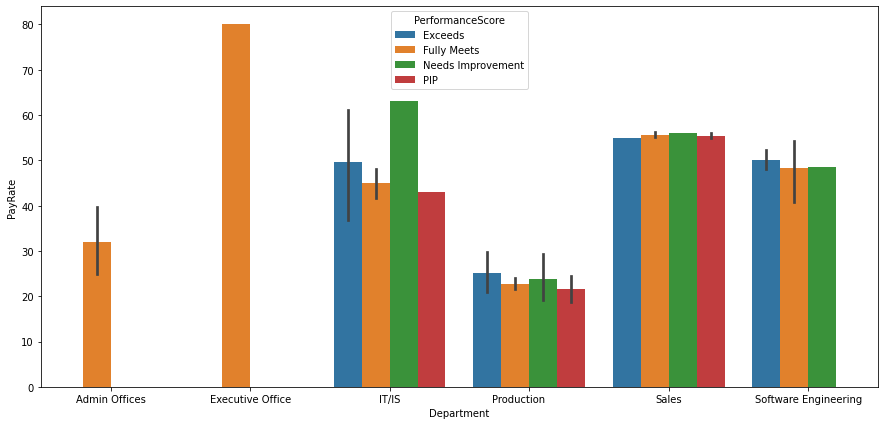

In [27]:
#ustteki grafige, data icindeki PerformanceScore degiskenini de ekleyip daha ayrintili gormeye calisalim
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu
#departmanın ve ödeme oranının ödeme oranına göre durumu
sns.barplot(x = "Department", y = "PayRate", hue = "PerformanceScore", data = data);

<AxesSubplot:xlabel='Department,PerformanceScore'>

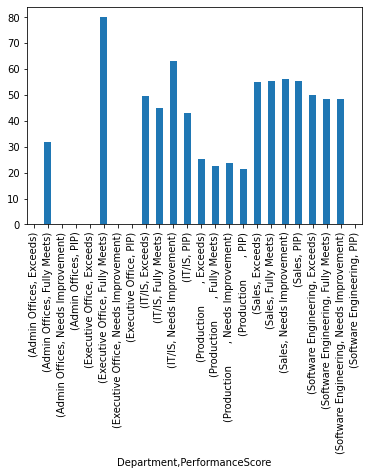

In [28]:
#seaborn kutuphanesinin grafikleri python plota gore daha gelismis
#departmanın ve performanceScore ödeme oranına göre durumu
data.groupby(["Department","PerformanceScore"])["PayRate"].mean().plot(kind="bar")

In [29]:
#üstteki grafiğin doğruluğunu da analiz etmeliyiz
data.groupby(["Department","PerformanceScore"])["PayRate"].mean()

Department            PerformanceScore 
Admin Offices         Exceeds                    NaN
                      Fully Meets          31.896000
                      Needs Improvement          NaN
                      PIP                        NaN
Executive Office      Exceeds                    NaN
                      Fully Meets          80.000000
                      Needs Improvement          NaN
                      PIP                        NaN
IT/IS                 Exceeds              49.708333
                      Fully Meets          44.886429
                      Needs Improvement    63.000000
                      PIP                  43.000000
Production            Exceeds              25.124074
                      Fully Meets          22.753797
                      Needs Improvement    23.733333
                      PIP                  21.562500
Sales                 Exceeds              55.000000
                      Fully Meets          55.570000
      

#### İstatistikte sıkça kullanılan bir görselleştirme yöntemi olan histogram, sütun grafiğinin bir miktar modifiye edilmiş halidir.
#### Histogram grafikleri genelde dağılıma bakmak için kullanılır

In [30]:
#histogram ve yoğunluk grafiği
df=data.copy()#datayı kopyalıyoruz 
df.head() #datanın ilk 5 verisine erişim

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


##### Histogram, ayrı kutulara düşen gözlemlerin sayısını sayarak bir veya daha fazla değişkenin dağılımını temsil eden klasik bir görselleştirme aracıdır.

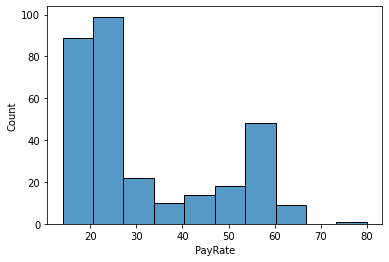

In [31]:
sns.histplot(df.PayRate);

In [32]:
df["PayRate"].describe()

count    310.000000
mean      31.284806
std       15.383615
min       14.000000
25%       20.000000
50%       24.000000
75%       45.315000
max       80.000000
Name: PayRate, dtype: float64

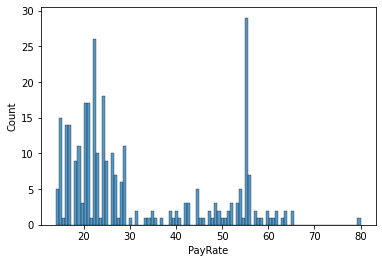

In [33]:
#grafiğin dağılım aralığını 100'e böldük
sns.histplot(df.PayRate, bins = 100);

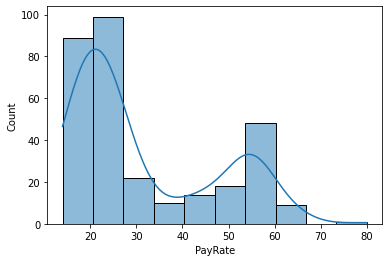

In [34]:
sns.histplot(df.PayRate,kde=True); # kde olasılık yogunluk fonksiyonu

##### kdeplot, Çekirdek Yoğunluk Tahmini grafikleridir. Bu KDE grafikleri, her gözlemin bu değere ortalanmış bir Gauss (Normal) dağılımla değiştirilmesini sağlar. 

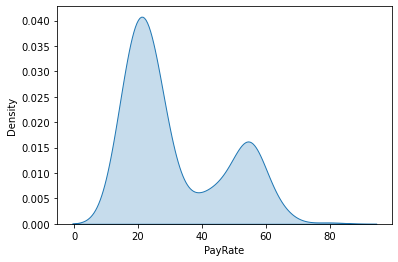

In [35]:
sns.kdeplot(df.PayRate, shade = True);

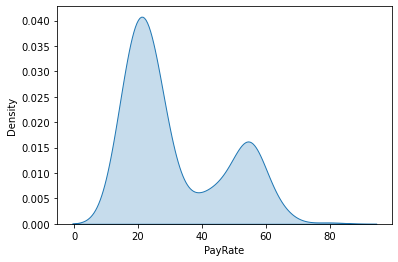

In [36]:
#histogram grafiklerinin çaprazlanması
#Veriseti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, kırılımların incelenmesini sağlar
sns.kdeplot(df.PayRate, shade = True);


**Not:** Üstteki grafikte iki tepe gözlemlemekteyiz, bu bize PayRate değişlenini etkileyen farkli etkenler olduğu bilgisini veriyor

<Figure size 1080x504 with 0 Axes>

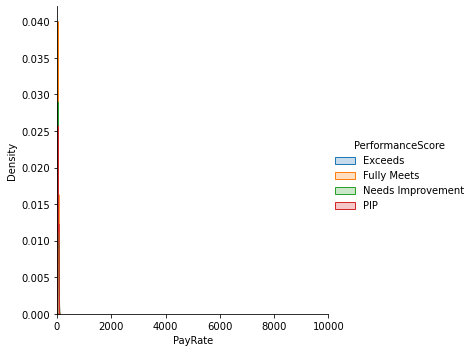

In [37]:
#Grafik üzerinde eklenen boyutları bölerek görüntülemek için kullanılır.
#ustte belirttigimiz grafigi map'leyerek facegrid'e uyguladik 
#boylece her bir PayRate degeri icin ayni yogunluk fonksiyonunu gözlemlemis olacagiz
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu
(sns
 .FacetGrid(df,
              hue = "PerformanceScore",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "PayRate", shade= True)
 .add_legend()
);

<Figure size 1080x504 with 0 Axes>

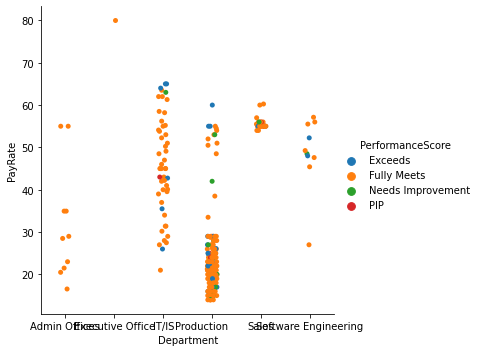

<Figure size 1080x504 with 0 Axes>

In [38]:
#önceki adı factorplot 
#Faktör grafiği, faktör sınıflarının grafiklerini kolayca ayırmaya yarar.
sns.catplot(x = "Department", y = "PayRate", hue = "PerformanceScore", data = data);
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu

<Figure size 7200x5760 with 0 Axes>

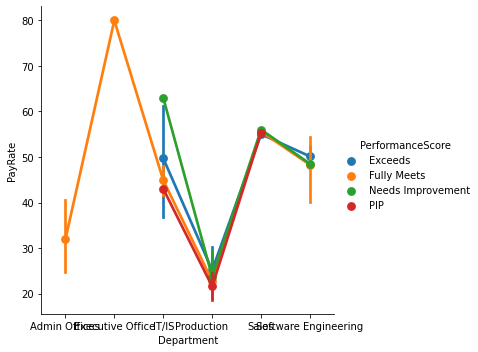

<Figure size 7200x5760 with 0 Axes>

In [39]:
sns.catplot(x = "Department", y = "PayRate", hue = "PerformanceScore",kind="point", data = data);
plt.figure(figsize=(100,80))#grafiğin boyutlarını ayarlama kodu

# boxplot grafiği
#### Bu tür bir grafik, dağıtımın çeyrek değerlerini aşırı değerler ile birlikte göstermektedir. “whiskers”, alt ve üst çeyreğin 1.5 IQR’sinde kalan noktalara kadar uzanır ve daha sonra bu aralığın dışına çıkan gözlemler bağımsız olarak görüntülenir. Daha da önemlisi, bu, kutu çizimindeki her değerin verideki gerçek gözlemlere karşılık geldiği anlamına gelir:

In [40]:
#boxplot grafiği
df["PayRate"].value_counts()

55.00    25
22.00    25
20.00    16
21.00    16
24.00    15
         ..
50.50     1
52.00     1
33.50     1
24.75     1
55.20     1
Name: PayRate, Length: 94, dtype: int64

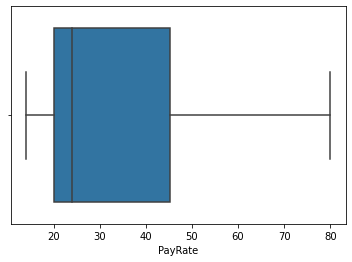

In [41]:
#quartiller araciligiyla bilgiler sunar
sns.boxplot(x = df["PayRate"]);

<Figure size 1080x504 with 0 Axes>

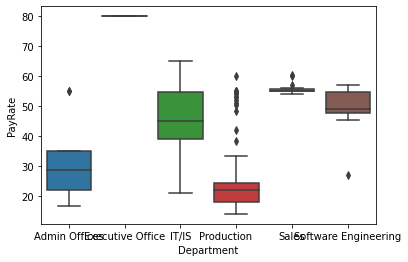

<Figure size 1080x504 with 0 Axes>

In [42]:
#Hangi departman daha fazla oranla ödeme almıştır?
sns.boxplot(x = "Department", y = "PayRate", data = data);
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu
#grafikte bulunan baklava dilimi şekilleri aykırı değerleri göstermektedirr
#Aykırı değer, bir veri setindeki gözlemlerin geri kalanından büyük ölçüde farklı olan herhangi bir veri noktasıdır.


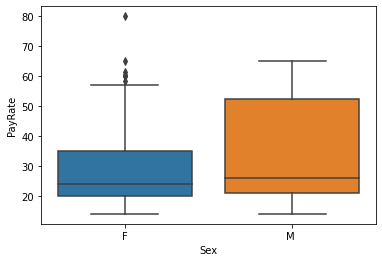

In [43]:
#erkek mi kadın mı daha çok ödeme oranı alıyor?
sns.boxplot(x = "Sex", y = "PayRate", data = df);

<Figure size 1080x504 with 0 Axes>

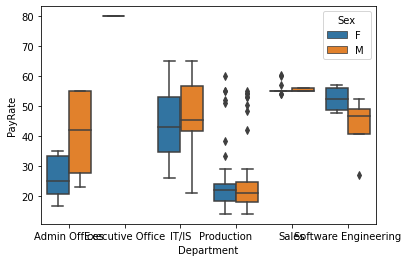

<Figure size 1080x504 with 0 Axes>

In [44]:
#cinsiyet ve departmanın ödeme oranına etkissini göstermektedir
sns.boxplot(x = "Department", y = "PayRate", hue = "Sex", data = df);
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu

## violin grafiği
 Violin (keman) grafiği, kutu grafiğinin alternatifidir.
Sadece özet istatistikleri göstermek yerine dağılımları gösterir.

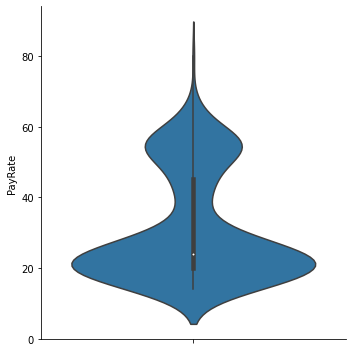

In [45]:
#violin garfiği
sns.catplot(y = "PayRate", kind = "violin", data = data);

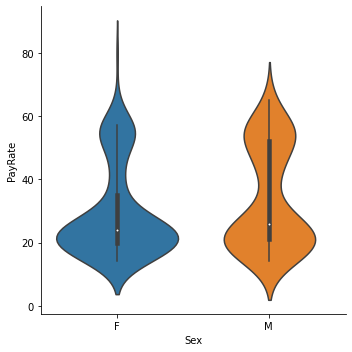

In [46]:
sns.catplot(x = "Sex", y = "PayRate", kind = "violin", data = data);

<Figure size 1080x504 with 0 Axes>

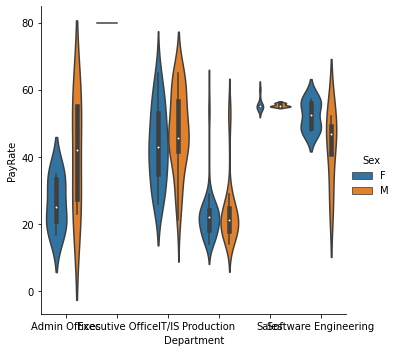

<Figure size 1080x504 with 0 Axes>

In [47]:
sns.catplot(x = "Department", y = "PayRate", hue = "Sex",kind = "violin", data = df);
plt.figure(figsize=(15,7))#grafiğin boyutlarını ayarlama kodu

# korelasyon grafikleri
#### Değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terim.

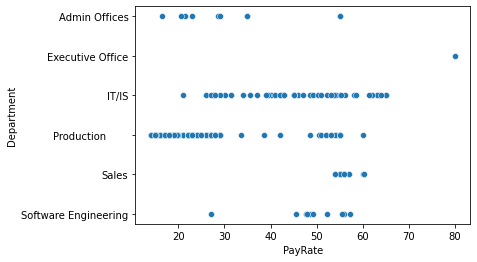

In [48]:
#performans skoruna ve ödeme oranı arasındaki ilişki
#scatterplot Saçılım Grafiği, sayısal değişkenler arasındaki ilişkiyei gösterir
sns.scatterplot(x = "PayRate", y = "Department", data = df);

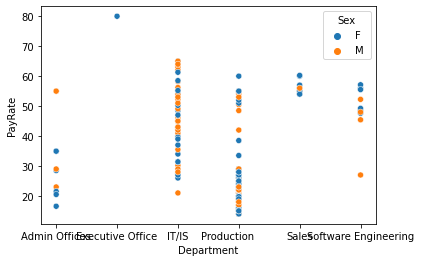

In [49]:
#scatterplot çaprazlama
sns.scatterplot(x = "Department", y = "PayRate", hue = "Sex",data = df);

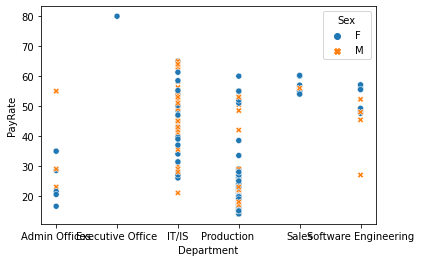

In [50]:
sns.scatterplot( x = "Department", y = "PayRate", hue = "Sex", style = "Sex", data = df);

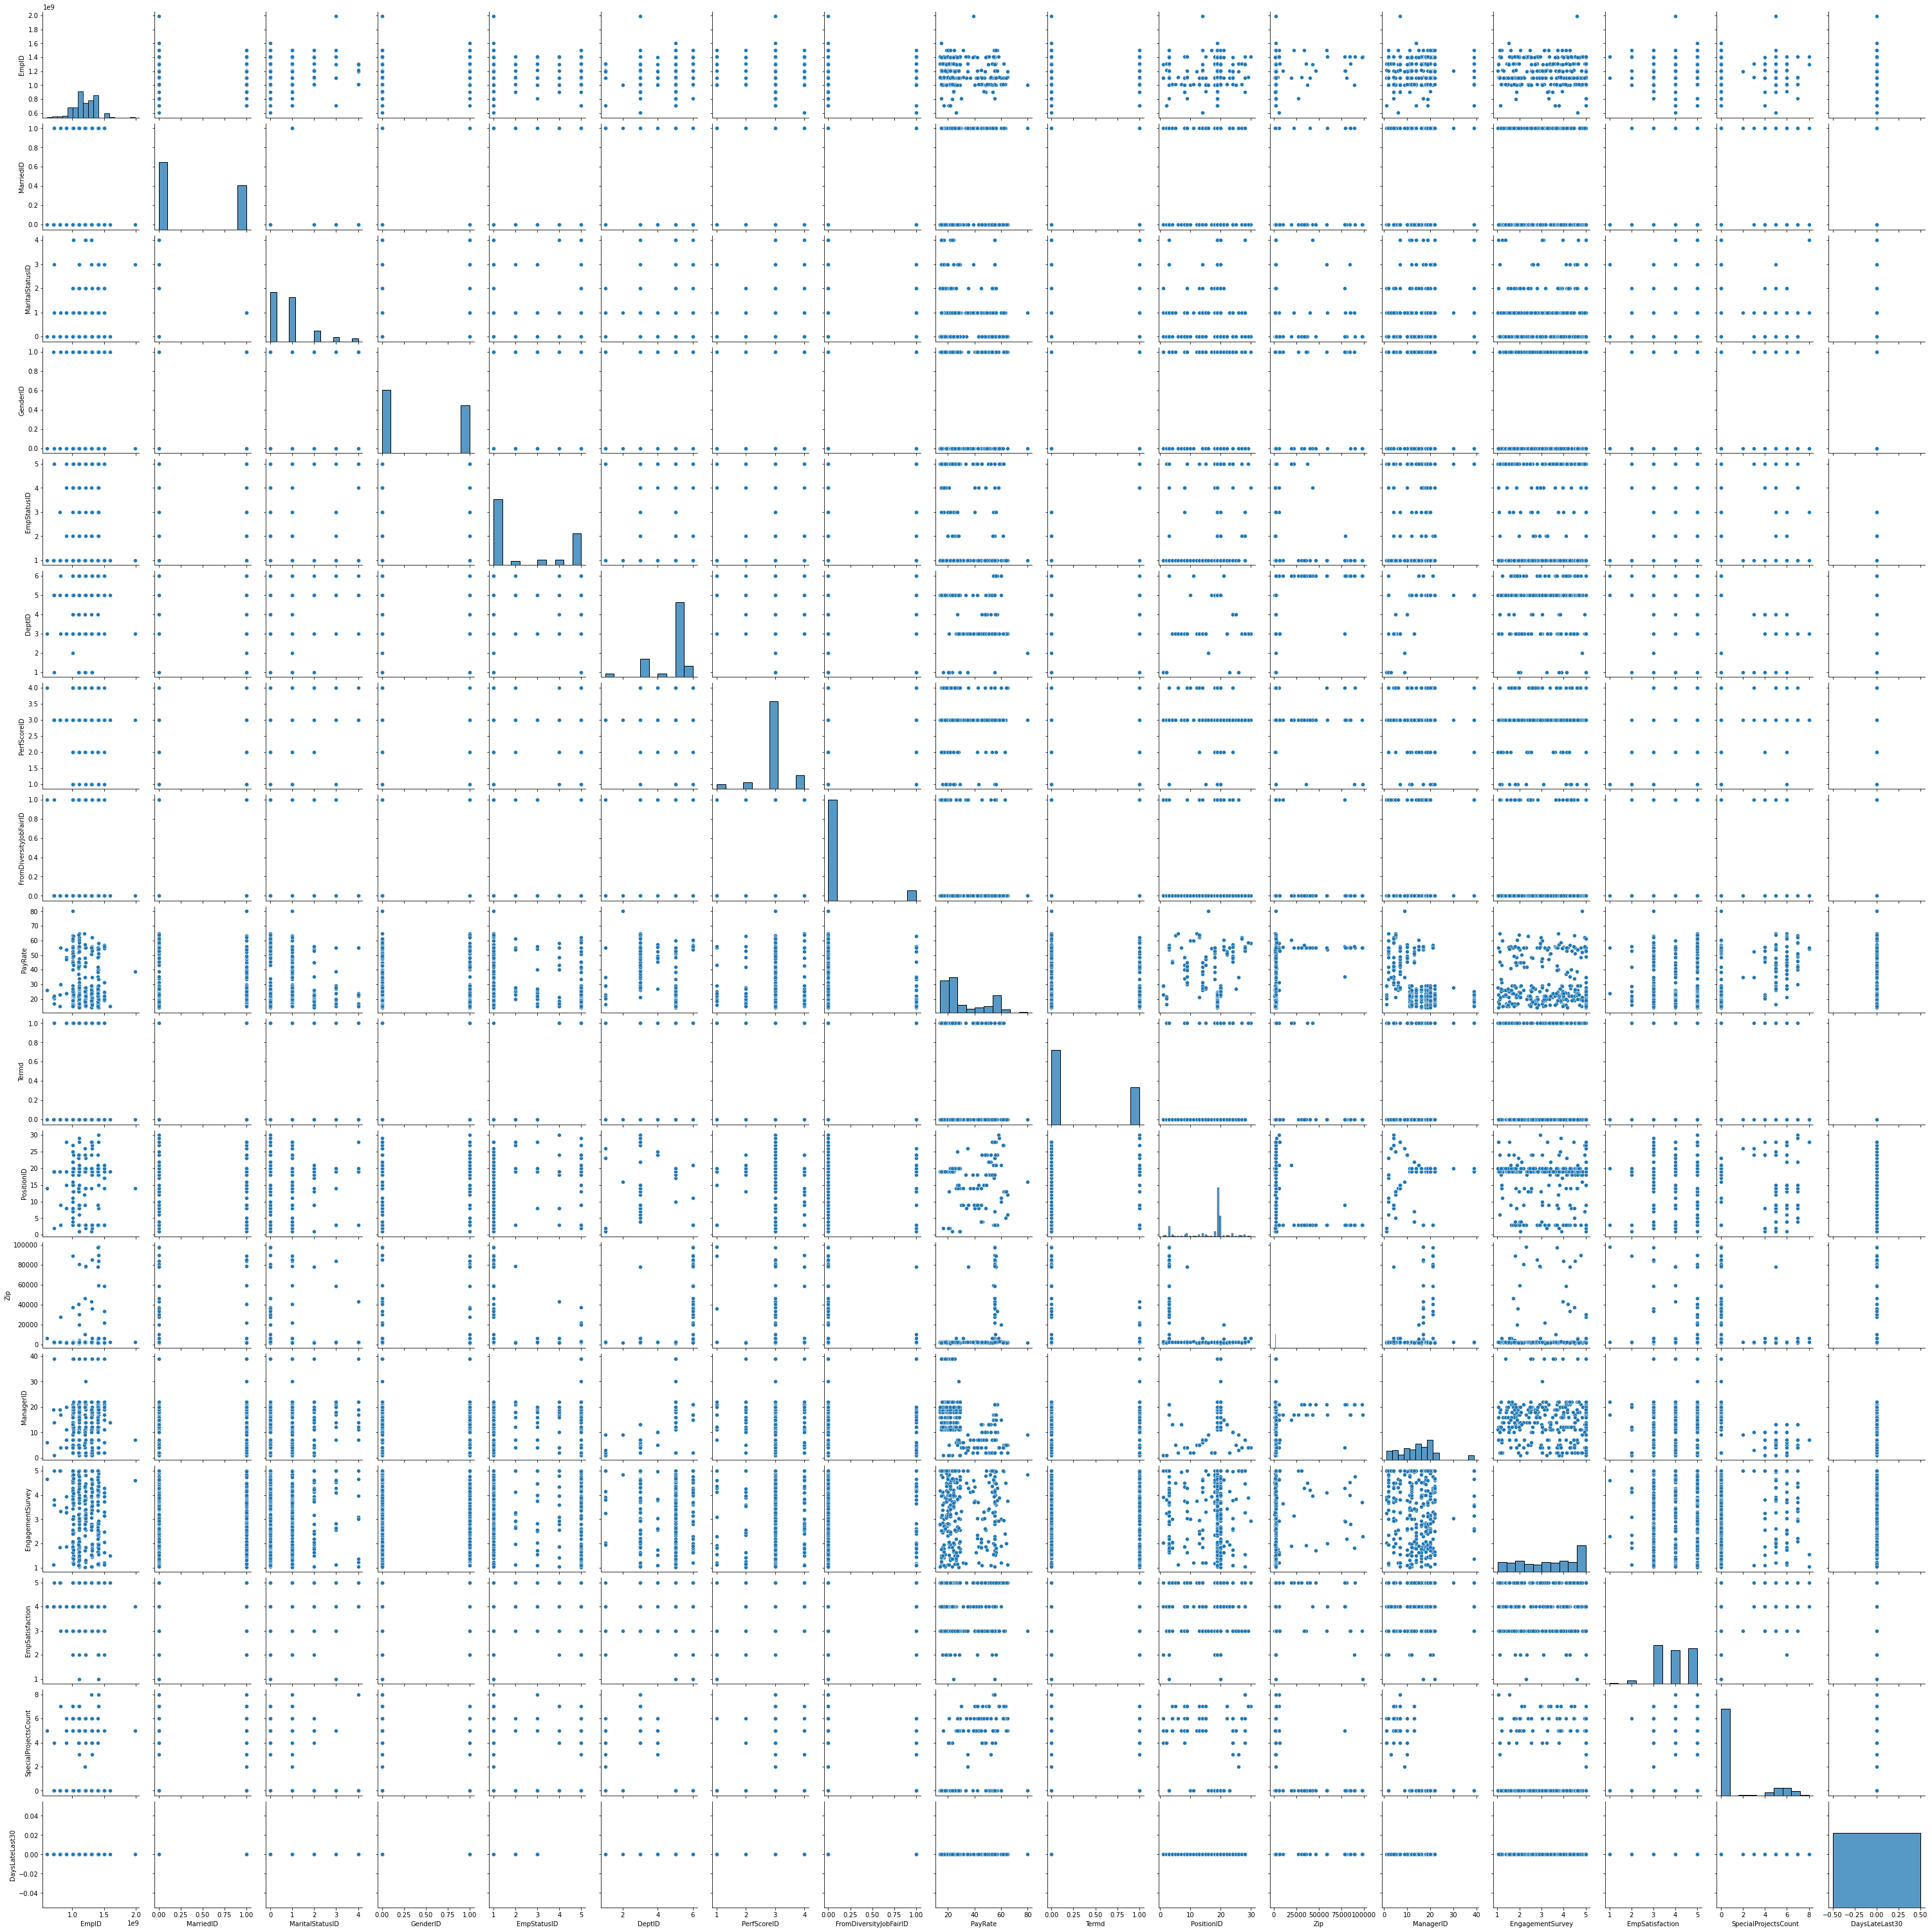

In [51]:
#scatterplot matrisi
#sayısal değişkenler arasındaki ilişkileri matris halinde gösterir
#solda satır isimleri altta sutun isimlerinin çaprazlanma sonuçları
sns.pairplot(df);

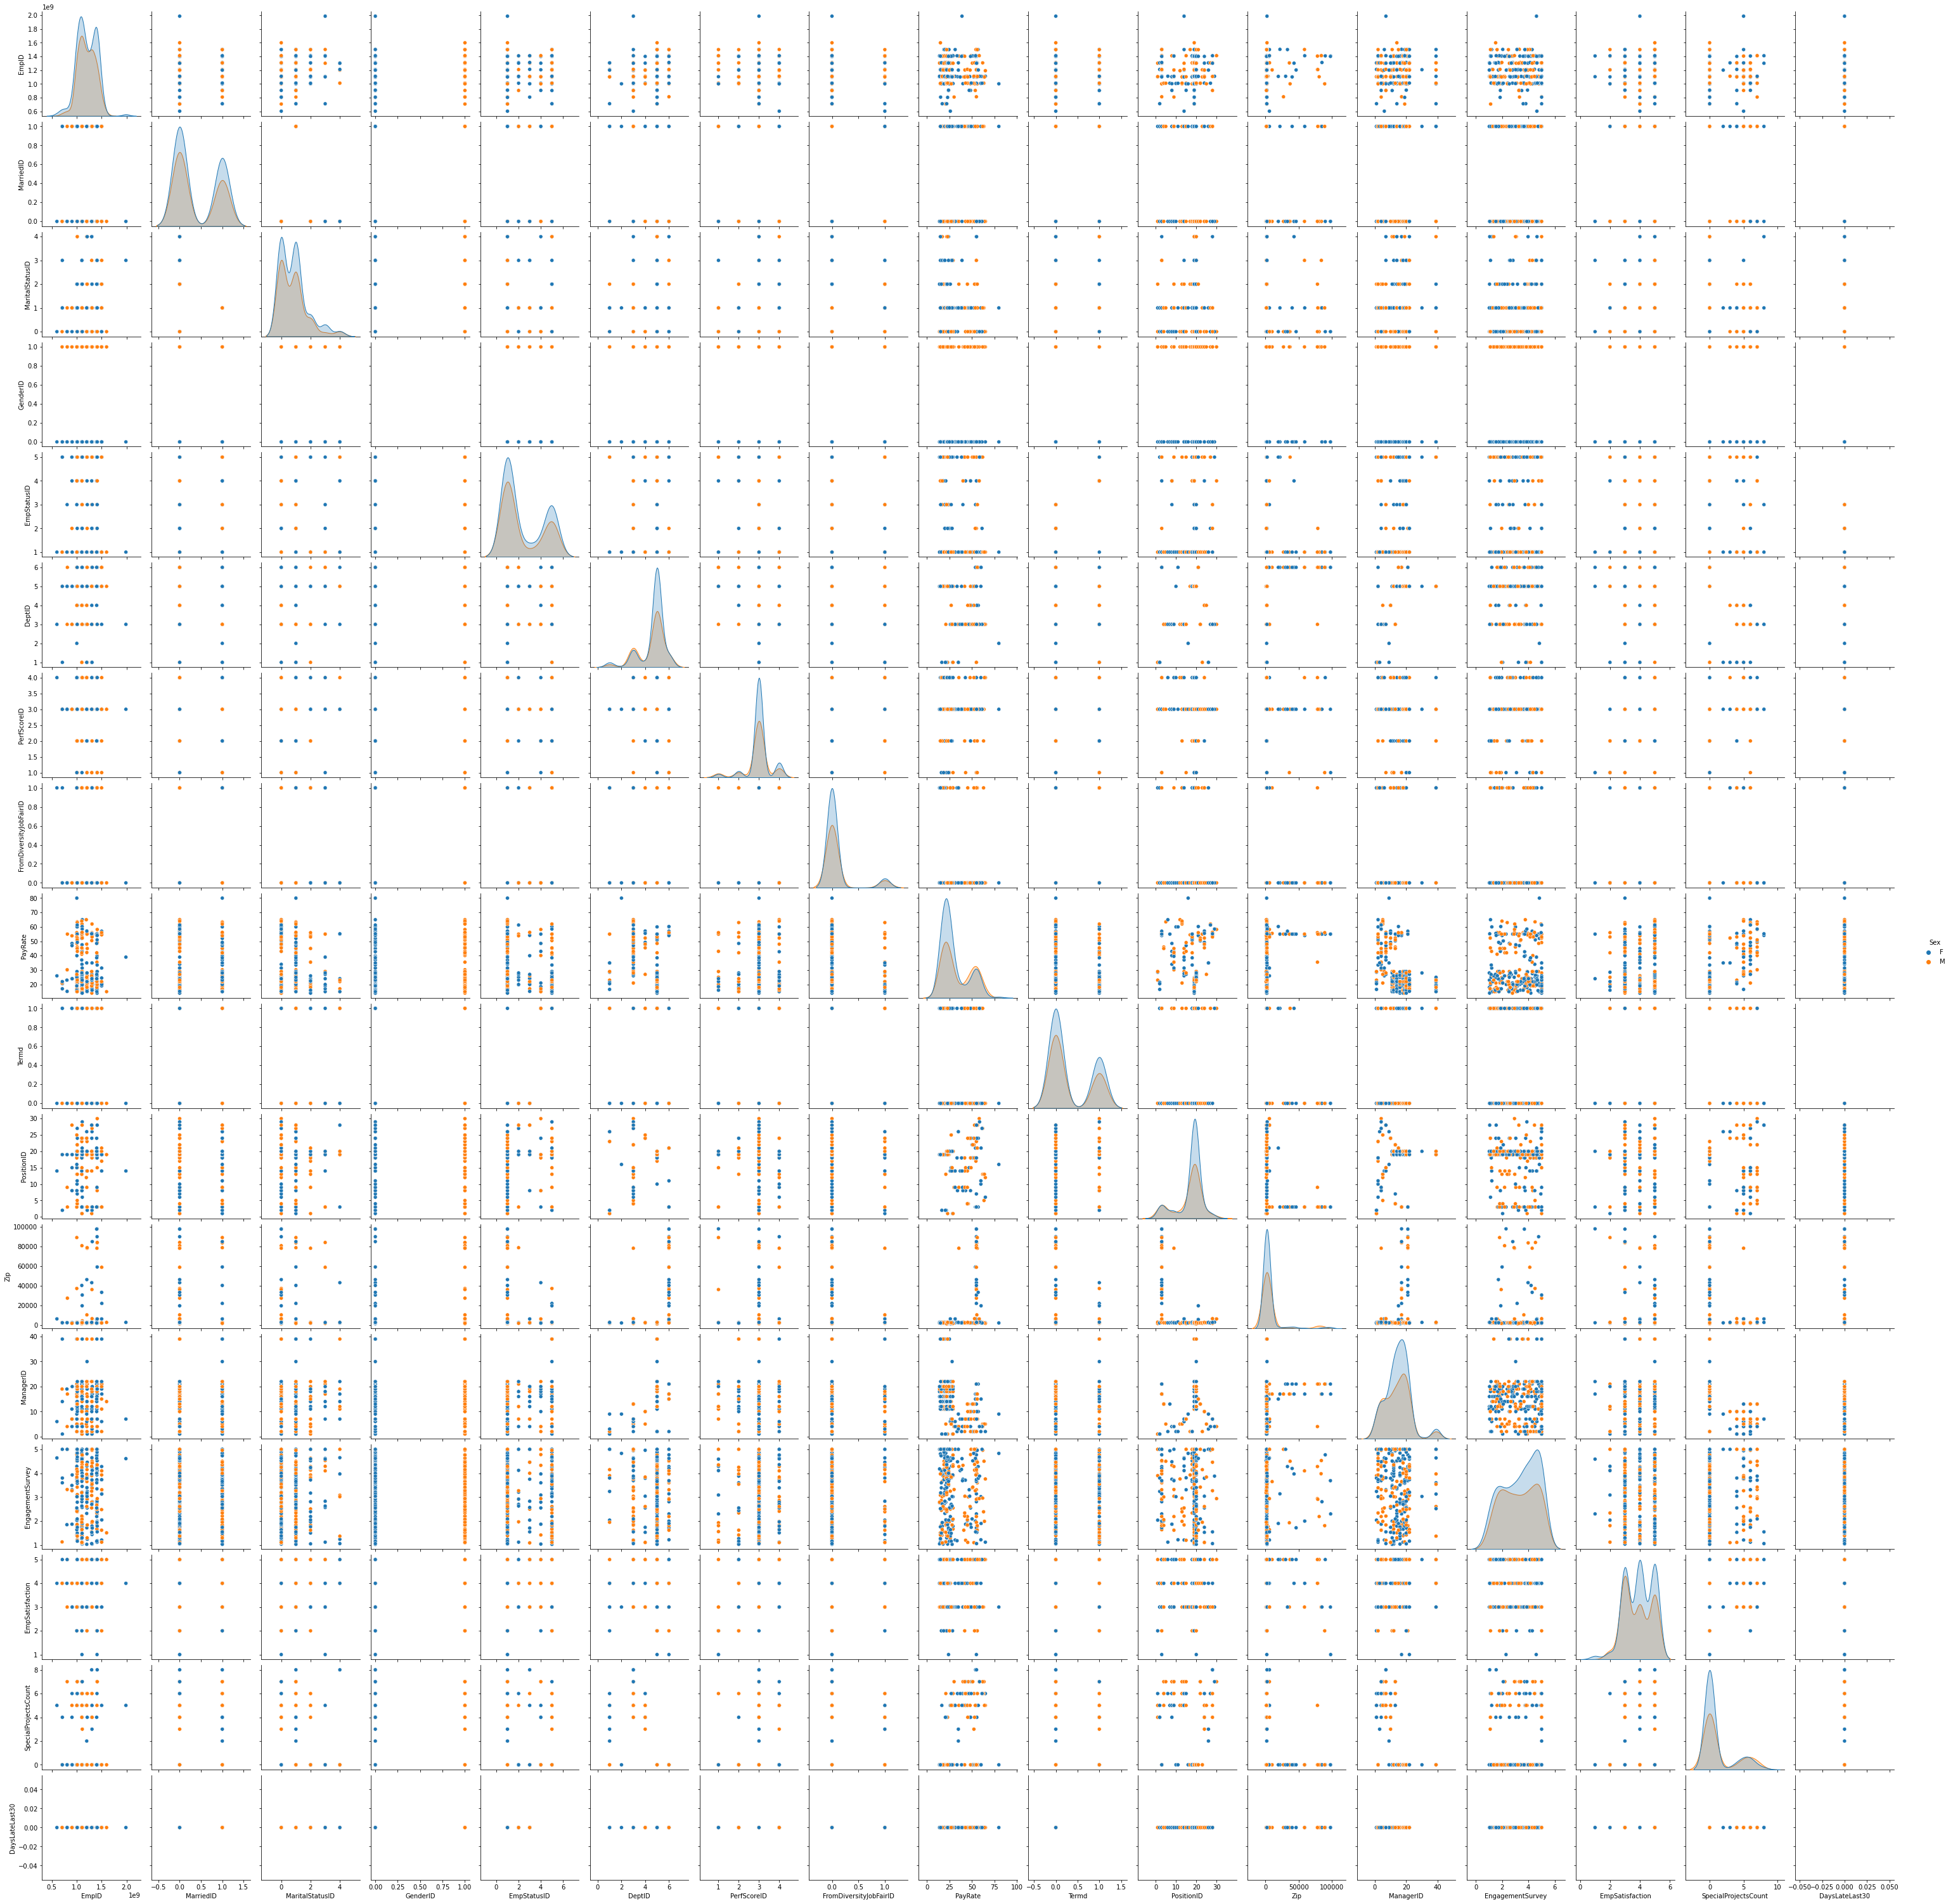

In [52]:
#cinsiyet bilgisini de grafiğe ekleyelim
sns.pairplot(df, hue = "Sex");

In [53]:
df.columns[df.isnull().any()]

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

# Heat Map (Isı Haritası)
### Isı Haritaları değişkenleri satırlara ve sütunlara yerleştirerek ve tablodaki hücreleri renklendirerek çok değişkenli verileri çapraz incelemek için yararlıdır. Isı haritaları, birden çok değişken arasında varyans göstermek, herhangi bir tasarım ortaya çıkarmak, herhangi bir değişkenin birbirine benzer olup olmadığını göstermek ve aralarında herhangi bir korelasyon olup olmadığını tespit etmek için kullanılabilir.


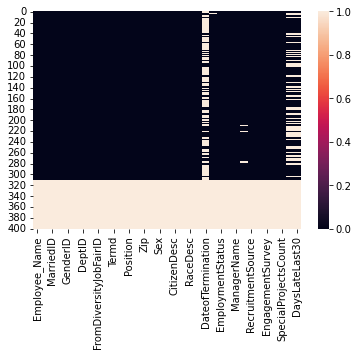

In [54]:
#aşşağıdaki ısı haritası grafiğinde eksik değerler olduğunu rahat bir eşkilde görebiliyoruz
sns.heatmap(df.isnull());

## Skewness(Çarpıklık) ve Kurtosis(Basıklık) Gösterimi

Skewness: 0.837191
Kurtosis: -0.748467


C:\Users\oykut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


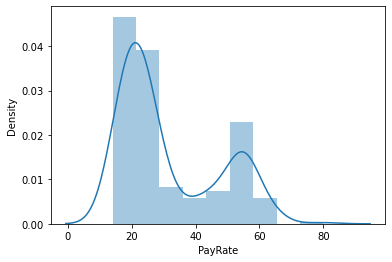

In [55]:
sns.distplot(df["PayRate"])
print("Skewness: %f" % df["PayRate"].skew());
print("Kurtosis: %f" % df["PayRate"].kurt());

Basıklık değeri -0.7 bu da demek oluyorki basıklık değeri çok düşük.Sonuç veri setinde az sayıda aykırı değer vardır.

### Shapiro-Wilks Testi : Normallik testi

In [56]:
stats.describe(df.PayRate)


DescribeResult(nobs=401, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

In [57]:
shapiro(df.PayRate)

ShapiroResult(statistic=nan, pvalue=1.0)

Sonuç p-value değeri 0.05'den küçük çıksaydı H0 hipotezini reddebilirdik fakat p-value değeri 1.0 çıktığı için H0 hipotezini reddemiyoruz.

### Hipotez testini uygulayalım

In [58]:
stats.ttest_1samp(df.PayRate, popmean = 180)

Ttest_1sampResult(statistic=nan, pvalue=nan)

p-value değeri 0.05'den küçük olduğu için H0 hipotezini reddedebiliriz.

## 1. Aykırı Gözlem 
Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

Aykırılığı ifade eden nümerik değere **aykırı değer** denir.

Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

Genellenebilirlik kaygısıyla oluşturulan kural setlerini yanıltır. Yanlılığa sebep olur. Bu nedenle genellemenin dışında kalacak aykırı verilerin çalışmanın dışına çıkartılması gerekir.

**Standart Sapma Yaklaşımı**

    Eşik değer= Ortalama + 1 X Standart Sapma
    Eşik değer= Ortalama + 2 X Standart Sapma
    Eşik değer= Ortalama + 3 X Standart Sapma
    
**Z-Skoru Yaklaşımı**

    Standart sapma yöntemine benzer şekilde, dağılımın sağından ve solundan -+2.5 eşiklenebilir.
    
**Boxplot Yöntemi**

    En sık kullanılan yöntemlerden biridir. Değişken değerleri küçükten büyüğe sıralanır. Q1,Q3 değerlerinin üzerinden bir eşik değer hesaplanır.
    
    IQR (Inter Quartile) = 1.5 x (Q3-Q1)
    Alt Eşik Değer = Q1 - IQR
    Üst Eşik Değer = Q3 + IQR


In [59]:
#aykırı değer analizi
df=df.select_dtypes(include=['float64'])#sadece sayısal değerleri alıyoruz
df=df.dropna()
df.head()


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
0,1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,1450.0,1.0,2.04,2.0,6.0,0.0
1,1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,1460.0,1.0,5.00,4.0,4.0,0.0
2,1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,2703.0,1.0,3.90,5.0,5.0,0.0
4,1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,2330.0,1.0,5.00,3.0,5.0,0.0
7,1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,0.0,3.0,5664.0,17.0,5.00,5.0,0.0,0.0


In [60]:
df_PayRate=df["PayRate"]
df_PayRate.head()

0    28.50
1    23.00
2    29.00
4    16.56
7    55.00
Name: PayRate, dtype: float64

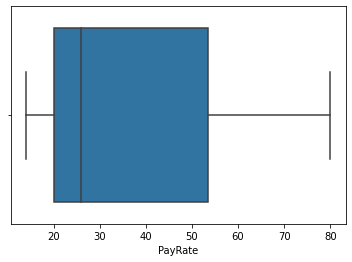

In [61]:
#çeyrerklere göre çalışan bir grafik
sns.boxplot(x = df_PayRate);

In [62]:
#çeyrekleri hesaplama
Q1 = df_PayRate.quantile(0.25)
Q3 = df_PayRate.quantile(0.75)
IQR = Q3-Q1

In [63]:
#çeyrekleri yazdırıyorurz
print(Q1)
print(Q3)
print(IQR)

20.0
53.4
33.4


In [64]:
#alt sınır ve üst sınır belirleme
#çeyreklerre göre belirler
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR


In [65]:
#sınırları yazdırıyoruz
print(alt_sinir)
print(ust_sinir)

-30.099999999999994
103.5


In [66]:

(df_PayRate < alt_sinir) | (df_PayRate > ust_sinir)

0      False
1      False
2      False
4      False
7      False
       ...  
305    False
306    False
307    False
308    False
309    False
Name: PayRate, Length: 199, dtype: bool

In [67]:
aykiri_tf = (df_PayRate < alt_sinir) | (df_PayRate > ust_sinir)
df_PayRate[aykiri_tf]

Series([], Name: PayRate, dtype: float64)

In [68]:
df_PayRate[aykiri_tf].index

Int64Index([], dtype='int64')

In [69]:
#aykırı değerleri olmadığı görünüyor

# makine öğrenmesi



#### Makine öğrenmesi, insanların öğrenme şekillerini taklit etmek için veri ve algoritmaların kullanımına odaklanıp doğruluğunu kademeli olarak artıran bir yapay zeka (AI) ve bilgisayar bilimi dalıdır.


## 4. Modelin Eğitilmesi (Training)
Makine Öğrenmesi modellerinin geliştirilmesinde eğitilen modelin yeni veya daha önce karşılaşmadığı veriler üzerinde iyi performans göstermesi arzu edilir. Yeni/karşılaşılmayan verileri simüle etmek için mevcut veriler eğitim ve test veri seti olarak 2’ye ayrılır. Özellikle, ilk bölüm eğitim seti olarak kullanılan veri daha büyük veri alt kümesidir (orijinal verilerin% 80'ini hesaba katmak gibi), ikincisi ise daha küçük bir alt kümedir ve test seti olarak kullanılır (geri kalan% 20 veri).


## 5. Değişken Seçimi
Modelleme çalışmaları sırasında veri setinin büyüklüğüne göre elmizde 5,10 hatta 100 tane bağımsız değişken olabilir. Bu bağımsız değişkenlerle Y bağımlı değişkenini tahmin etmeye çalışılır. Amaç en az değişkenle, en fazla açıklanabilirliği yakalamaya çalışmaktır.

## 6. Model Seçimi
Temelde iki yöntem ön plana çıkmaktadır.

    Oluşabilecek değişken kombinasyonları ile oluşturulan modeller arasında en iyi model seçilmeye çalışılır.
    Kurulan birbirinden farklı modeller arasından model seçmeye çalışılır.
    
Model Neye Göre Seçilir?
    
    Regresyon problemleri için açıklanabilirlik oranı ve RMSE (hata ölçüm metriği) türevi bir değer kullanılır.
    Sınıflandırma problemleri için doğru sınıflandırma oranı (model başarısını değerlendirme metriği) türevi bir değer kullanılır


## 7. Doğrulama Yöntemleri
Makine öğrenmesi modellerinin ürettiği sonuçların doğruluğunun değerlendirilmesi için kullanılır.

### 7.1. Holdout Yöntemi
1000 gözlemlik veri setini %80 — %20 olarak eğitim ve test setine bölme işlemidir. 800 gözlemle eğitim ve 200 gözlemle test işlemi gerçekleştirilir.

### 7.2. K-Katlı Çapraz Doğrulama (K Fold Cross Validation) Yöntemi
Veri seti k adet parçaya ayrılır. Daha sonra belirlenen alt kümlerden birisi dışarıda bırakılır. Elde kalan diğer kümeler ile model oluşturulur ve model dışarıda bırakılan küme ile test edilir. Bu çalışma bütün parçalar için tekrar edilir.

Elde edilen hataların ortalaması alındığında bu validasyon/doğrulama (eğitim) hatası olur. Daha sonra çalışmanın en başında bölünen test seti ile model test edilir.

![OnPaste.20220504-164059.png](attachment:OnPaste.20220504-164059.png)

## 3. Sınıflandırma Problemleri

Sınıflandırmada, bir veri kümesi (data set) birbirinden farklı ve önceden belirlenmiş sınıflardan birine atanmasıdır. Sınıflandırma algoritmaları, verilen eğitim kümesinden hangi veriyi hangi sınıfa atayacağını öğrenir.  Daha sonra test verilerini doğru sınıflara atamaya çalışır.

Verilerin sınıflarını belirten değerlere etiket (label) denir.

    • Lojistik Regresyon (LR)
    • Naive Bayse (NB)
    • K-En Yakın Komşu (KNN) 
    • Destek Vektör Sınıflandırıcı (SVC) 
    • RBF Destek Vektör Sınıflandırıcı (SVC) 
    • Çok Katmanlı Algılayıcılar (ANN) 
    • Classification and Regression Tress (CART) 
    • Random Forests (RF) 
    • Gradient Boosting Machines (GBM) 
    • Extreme Gradient Boosting (XGBoost) 
    • LightGBM 
    • CatBoost 

In [70]:
y = df["PayRate"]
#bağımlı değişken olarak PayRate değişkeni seçiyorum

In [71]:
del df["PayRate"]
# bağımlı değişkeni tablodan siliyorum.

In [72]:
x = df.values


In [73]:
y = y.values

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# random forests modeli

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

In [75]:
model = RandomForestRegressor(random_state=42)
#modeli eğitimi

In [76]:
model.fit(x_train , y_train)
#modele veri setini uyguluyorum.

RandomForestRegressor(random_state=42)

In [77]:
model.predict(x_test)[0:5]

array([17.6725, 54.0965, 19.2175, 26.1238, 19.31  ])

In [78]:
y_pred=model.predict(x_test)
#tahmin edilen değerlere erişelim için tanımladım

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.658734808123341

In [80]:
print(" Ortalama Kare hatası (MES): ",mean_squared_error(y_test,y_pred))

 Ortalama Kare hatası (MES):  32.0212796286667


In [81]:
print(" Doğruluk oranı: ", model.score(x_test, y_test)*100)

 Doğruluk oranı:  85.91337518412558


In [82]:
print(" Kök Ortalama Kare Hatası(RMSE): ",np.sqrt(mean_squared_error(y_test,y_pred)))

 Kök Ortalama Kare Hatası(RMSE):  5.658734808123341


In [83]:
karsılasma = pd.DataFrame({"Gerçek Değerler": y[0:12],
                           "Tahmin Değerleri": model.predict(x)[0:12]})
karsılasma

,Gerçek Değerler,Tahmin Değerleri
0,28.50,33.2949
1,23.00,27.0650
2,29.00,31.0482
3,16.56,22.2874
4,55.00,55.0500
5,55.00,54.6950
6,56.00,55.7000
7,55.50,55.4850
8,55.50,55.2150
9,55.00,55.0400


In [84]:
params = {"max_depth":[5,8,10],
          "max_features":[2,5,10],
          "n_estimators":[200,500,1000,2000],
          "min_sample_split":[2,10,80,100]}

### Gradient Boosting Regresyonu Modeli

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.
Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.
• Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 

• Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 

• GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır. 

• GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...) 

• Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir. 

• Boosting + Gradient Descent 


In [85]:
model_gbm = GradientBoostingRegressor()

In [86]:
model_gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [87]:
y_pred=model_gbm.predict(x_test)

In [88]:
print("Ortalama Kare hatası (MES) :",mean_squared_error(y_test,y_pred))

Ortalama Kare hatası (MES) : 29.387065913488527


In [89]:
print('Doğruluk Oranı: ', model_gbm.score(x_test, y_test)*100)

Doğruluk Oranı:  87.07220396051608


In [90]:
print("Kök Ortalama Kare Hatası(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

Kök Ortalama Kare Hatası(RMSE): 5.420983851063248


In [91]:
karsılasma = pd.DataFrame({"Gerçek Değerler": y[0:10],
                           "Tahmin Değerleri": model_gbm.predict(x)[0:10]})
karsılasma

,Gerçek Değerler,Tahmin Değerleri
0,28.50,28.555723
1,23.00,23.355966
2,29.00,28.854059
3,16.56,17.388301
4,55.00,55.101147
5,55.00,55.043204
6,56.00,55.282341
7,55.50,55.157261
8,55.50,55.020938
9,55.00,54.690262


# K-MEANS Model

k-means algoritmasında kullanılan örneklem, k adet kümeye bölünür. Algoritmanın özü birbirlerine benzerlik gösteren verilerin aynı küme içerisine alınmasına dayanır. Algoritmadaki benzerlik terimi, veriler arasıdaki uzaklığa göre belirlenmektedir

Bu algoritmada ‘K’ parametresi elimizdeki verinin kaç tane kümeye ayrılacağını belirtiyor. Bu parametrenin seçimi için birkaç analiz yöntemi olsa da en iyisi algoritmayı farklı k değerlerinde yürütüp işimize en çok yarayanı almaktır. Çünkü farklı sayıda gruplar, farklı özellikleri yüz üstüne çıkarabilir.

### 4.1. K-Means
Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak kümelere ayırmaktır.


İşlem adımları:

    1. Küme sayısını belirle
    2. Rastgele k merkezi seç
    3. Her gözlem için k merkezlerine olan uzaklıkları hesapla
    4. Gözlemleri kendilerine en yakın k merkezine ata
    5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla
    6. belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin kümelenme yapısını nihai kümelenme olarak seç
    

In [92]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [93]:
k_fit = kmeans.fit(df)

In [94]:
k_fit.n_clusters

4

In [95]:
k_fit.cluster_centers_

array([[1.05322832e+09, 4.09638554e-01, 6.50602410e-01, 4.45783133e-01,
        1.16867470e+00, 4.24096386e+00, 3.01204819e+00, 2.40963855e-02,
        0.00000000e+00, 1.60240964e+01, 4.86542169e+03, 1.21445783e+01,
        3.28722892e+00, 3.85542169e+00, 2.19277108e+00, 0.00000000e+00],
       [1.43944648e+09, 3.58490566e-01, 9.62264151e-01, 3.77358491e-01,
        1.18867925e+00, 5.01886792e+00, 3.00000000e+00, 1.32075472e-01,
        0.00000000e+00, 1.53018868e+01, 1.49610943e+04, 1.50188679e+01,
        3.25377358e+00, 3.83018868e+00, 6.79245283e-01, 0.00000000e+00],
       [1.26306610e+09, 3.68421053e-01, 7.01754386e-01, 4.73684211e-01,
        1.15789474e+00, 4.54385965e+00, 3.03508772e+00, 5.26315789e-02,
        0.00000000e+00, 1.67894737e+01, 7.83136842e+03, 1.37368421e+01,
        3.41807018e+00, 4.00000000e+00, 1.21052632e+00, 0.00000000e+00],
       [7.40174200e+08, 1.66666667e-01, 6.66666667e-01, 5.00000000e-01,
        1.00000000e+00, 4.50000000e+00, 3.16666667e+00, 1.666

In [96]:
k_fit.labels_

array([0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0,
       0, 2, 0, 0, 0, 2, 1, 3, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 3, 0, 2, 0, 1, 2, 0, 1, 0, 0,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 3, 3, 1, 0, 2, 2,
       2, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2,
       2])

### görselleştirme

In [97]:
#iki degisken uzerinden gorsellestirme yapalim (2 boyutta veriyi gorebilmek icin)
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [98]:
kumeler = k_fit.labels_

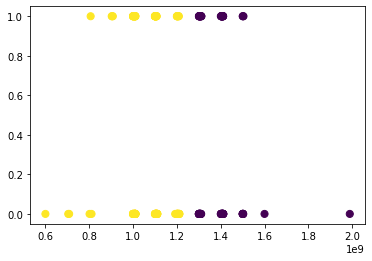

In [99]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

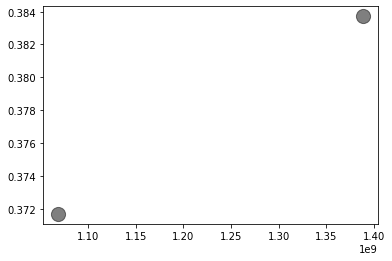

In [100]:
merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

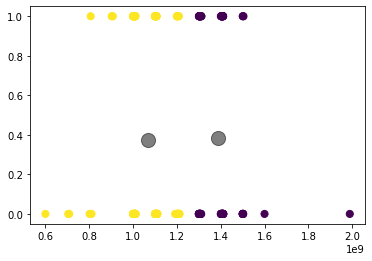

In [101]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [102]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [103]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\oykut\AppData\Local\Temp/ipykernel_14456/3108031453.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


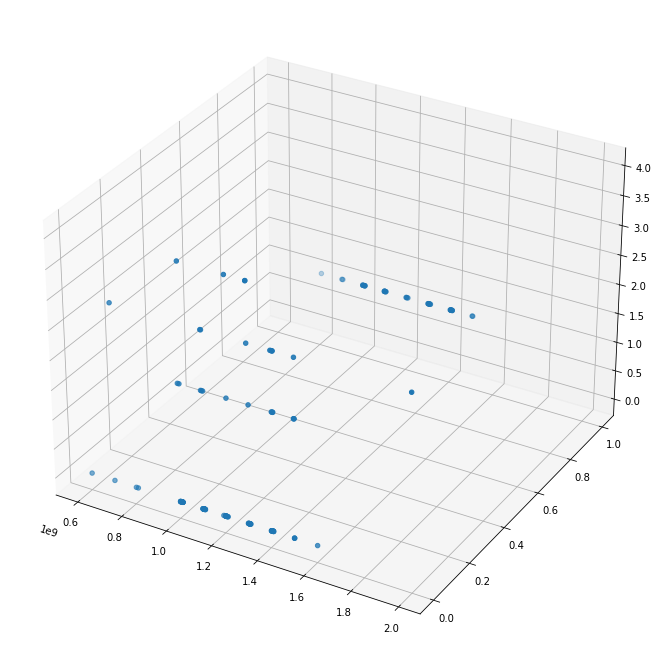

In [104]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

C:\Users\oykut\AppData\Local\Temp/ipykernel_14456/4079090235.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


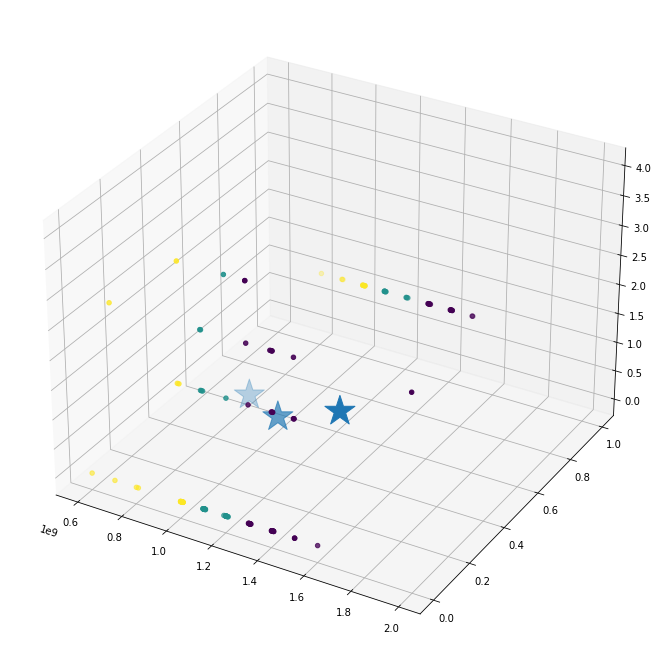

In [105]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],  c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           s=1000);

In [106]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [107]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,0,2
1,1,2
2,2,1
3,4,1
4,7,1
5,8,1
6,9,1
7,10,2
8,12,1
9,14,1


In [108]:
df["kume_no"] = kumeler

In [109]:
df.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,kume_no
0,1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,1450.0,1.0,2.04,2.0,6.0,0.0,2
1,1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,1460.0,1.0,5.00,4.0,4.0,0.0,2
2,1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,2703.0,1.0,3.90,5.0,5.0,0.0,1
4,1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,2.0,2330.0,1.0,5.00,3.0,5.0,0.0,1
7,1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,0.0,3.0,5664.0,17.0,5.00,5.0,0.0,0.0,1


In [110]:
df["kume_no"] = df["kume_no"] + 1

In [111]:
df.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,kume_no
0,1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,1450.0,1.0,2.04,2.0,6.0,0.0,3
1,1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,1460.0,1.0,5.00,4.0,4.0,0.0,3
2,1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,2703.0,1.0,3.90,5.0,5.0,0.0,2
4,1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,2.0,2330.0,1.0,5.00,3.0,5.0,0.0,2
7,1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,0.0,3.0,5664.0,17.0,5.00,5.0,0.0,0.0,2


In [112]:
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID
0,1.0,1.0,0.0,1.0
1,0.0,2.0,1.0,1.0
2,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0


 # DATA SETİ İÇİN EN UYGUN MODELLEME YÖNTEMİ GRADİENT BOOSTİNG REGRESYONU MODELİDİR

In [116]:

from sklearn.neural_network import MLPClassifier





In [124]:
model = RandomForestRegressor()
model.fit(x, y)
predictions = model.predict(x_test)
sonuc = pd.DataFrame({"Gerçek Değerler": y[0:12],
                      "Gradient Bossting Regresyonu Tahmin Değerleri ": model_gbm.predict(x)[0:12],
                      "Random Forest Tahmin Değerleri": model.predict(x)[0:12]})
sonuc

,Gerçek Değerler,Gradient Bossting Regresyonu Tahmin Değerleri,Random Forest Tahmin Değerleri
0,28.50,28.555723,32.9678
1,23.00,23.355966,27.8435
2,29.00,28.854059,32.3719
3,16.56,17.388301,21.5352
4,55.00,55.101147,55.0000
5,55.00,55.043204,54.9800
6,56.00,55.282341,55.7900
7,55.50,55.157261,55.5000
8,55.50,55.020938,55.2500
9,55.00,54.690262,54.8900


# yukardaki tablodan yola çıkarak arasında en az sapma olan gradient boosting regrasyonu tercih edeceğimiz modellemedir